# The Spark Foundatiion Intership

# Data Science and Business Analytics

# Task 2

# Predict:-The purpose is if we feed any new data to this classifier,it would be able to predict the right class accordingly.

# Shrushti chavan

In [40]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [41]:
df=pd.read_csv("iris1.csv")

In [42]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [43]:
#shape of dataset

df.shape

(150, 6)

In [44]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [45]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [46]:
#df['Species']=encoder.fit_transform(df['Species'])

In [47]:
#df.Species.unique()

In [48]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

C:\Users\Sagar\anaconda3\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


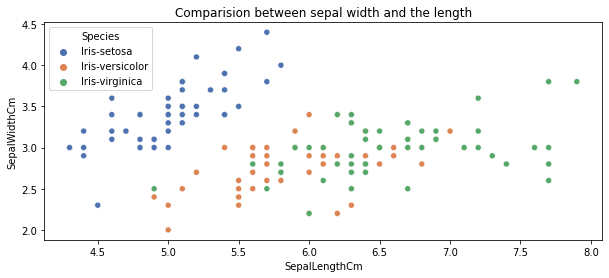

In [49]:
plt.figure(figsize=(10,4))
plt.title("Comparision between sepal width and the length")
sns.scatterplot(df['SepalLengthCm'],df['SepalWidthCm'],hue=df['Species'],palette='deep')
plt.show()

C:\Users\Sagar\anaconda3\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


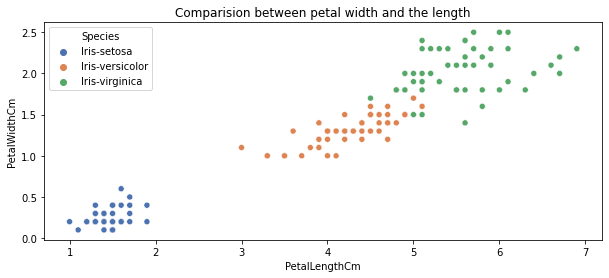

In [50]:
plt.figure(figsize=(10,4))
plt.title("Comparision between petal width and the length")
sns.scatterplot(df['PetalLengthCm'],df['PetalWidthCm'],hue=df['Species'],palette='deep')
plt.show()

<AxesSubplot:>

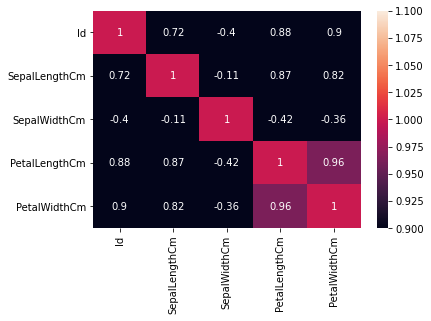

In [51]:
#correlation between feature
sns.heatmap(df.corr(),annot=True,vmin=1,vmax=1)

In [52]:
#Sperate Dependent and independent

y=df['Species']
x=df.drop(['Id','Species'],axis=1)

In [53]:
x.shape,y.shape

((150, 4), (150,))

In [54]:
#Splitting traning and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
classifier=DecisionTreeClassifier()

In [57]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [58]:
y_pred=classifier.predict(x_test)

In [59]:
y_actual=np.array(y_test)

In [60]:
from sklearn.metrics import confusion_matrix,classification_report

In [61]:
confusion_matrix(y_actual,y_pred)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

In [62]:
print(classification_report(y_actual,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [63]:
from sklearn.tree import export_text
text=export_text(classifier)
print(text)

|--- feature_2 <= 2.35
|   |--- class: Iris-setosa
|--- feature_2 >  2.35
|   |--- feature_2 <= 4.95
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: Iris-versicolor
|   |   |--- feature_3 >  1.65
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: Iris-versicolor
|   |--- feature_2 >  4.95
|   |   |--- feature_2 <= 5.05
|   |   |   |--- feature_0 <= 6.50
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_0 >  6.50
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  5.05
|   |   |   |--- class: Iris-virginica



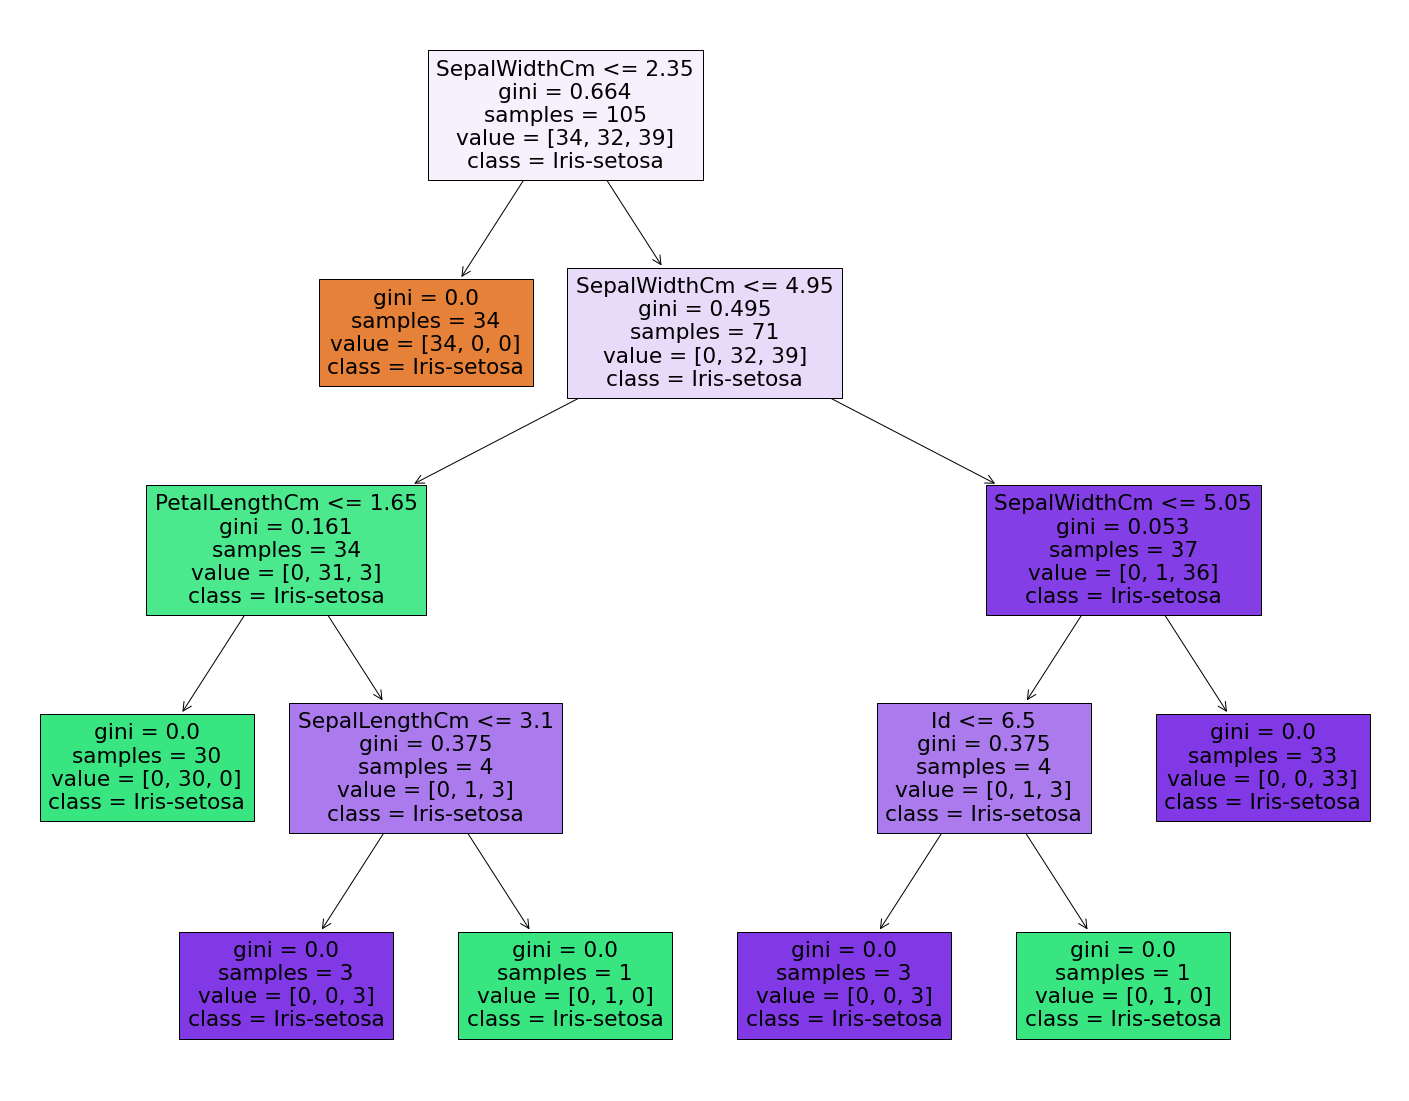

In [64]:
with open('decission_tree.log','w') as fout:
    fout.write(text)
    
from sklearn import tree
fig=plt.figure(figsize=(25,20))
tree1=tree.plot_tree(classifier,
                 feature_names=df.columns,
                 class_names=df.Species,
                 filled=True)